In [7]:
# Initial Set-Up
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score

1.	Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.

In [3]:
diabetes_df = pd.read_csv("../wk_13_hmwk/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Define variables
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [11]:
# Perform SMOTE-ENN on the dataset
resample=SMOTEENN(random_state=43, sampling_strategy='all')

X_res, y_res = resample.fit_resample(X,y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=43, stratify = y_res)

2.	Perform logistic regression with the new data from question 1. 

In [14]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=model.predict(X_test)

scores = lr.score(y_pred,y_test)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
print(“resampled: ” + str(lr.score(X_resampled, y_resampled)))
print(“test data: ” + str(lr.score(X_test, y_pred))) 

C:\Users\jmortensen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jmortensen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 1 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

a.	Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model


3.	Create an ROC Curve for the model https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html and calculate the AUC. 

In [ ]:
scores = cross_val_score(lr, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

a.	BRIEFLY explain what the ROC Curve shows and what the resulting AUC means. 

4.	What is outlier detection? Why is it useful? What methods can you use for outlier detection?

5.	Perform a linear SVM to predict credit approval (last column) using this dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . Make sure you look at the accompanying document that describes the data in the dat file. You will need to either convert this data to another file type or import the dat file to python. 
You can use this code, but otherwise you follow standard practices we have already used many times: 
from sklearn.svm import SVC
classifier = SVC(kernel='linear')

a.	How did the SVM model perform? 

6.	What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words. 

## DataCamp

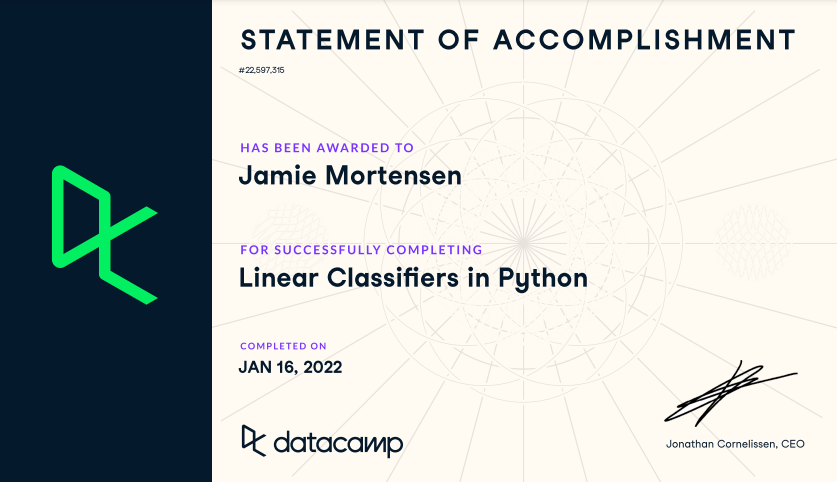

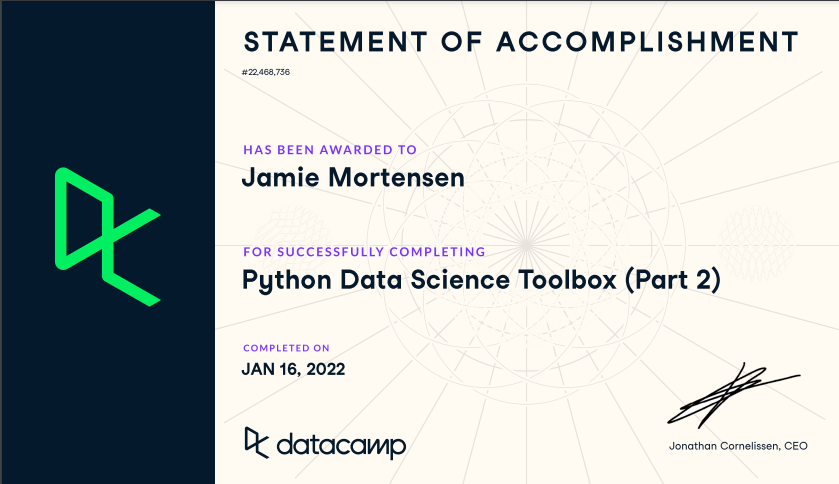